In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning - Colab/Daibetes data/Copy of diabetes.csv')

This is the data of indian women (age >21)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
len(df[df['Outcome'] == 0]), len(df[df['Outcome'] == 1])

(500, 268)

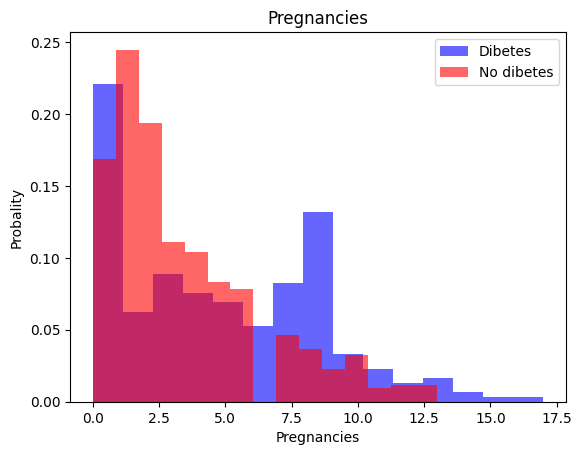

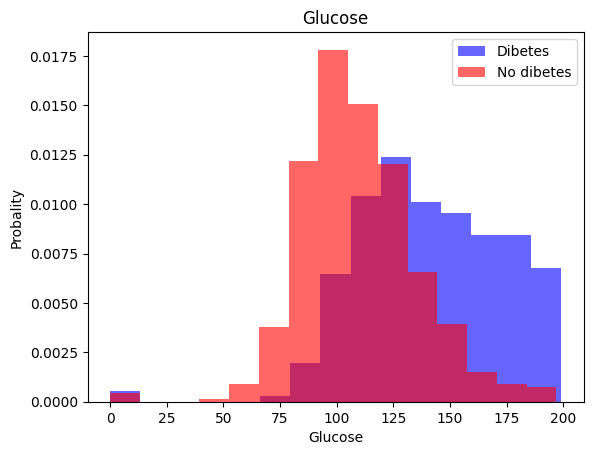

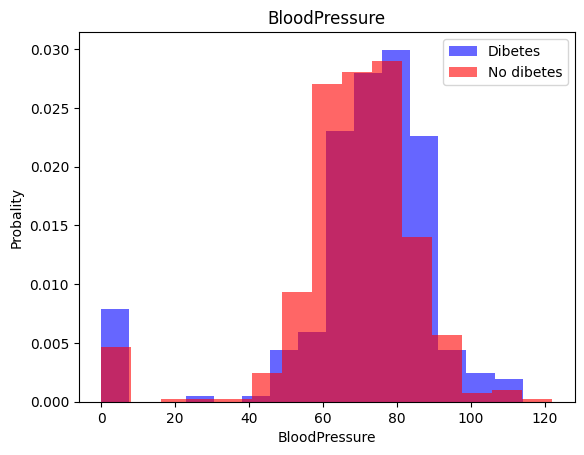

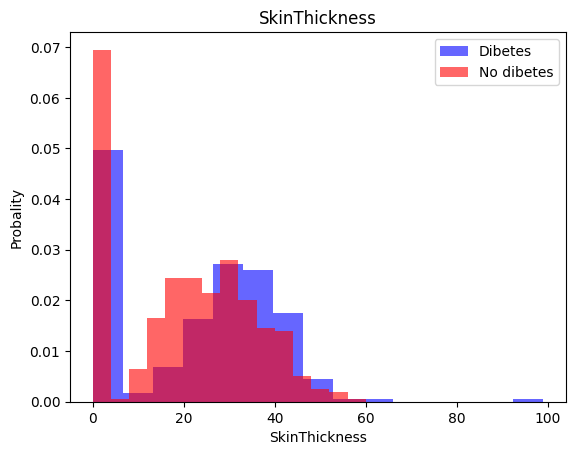

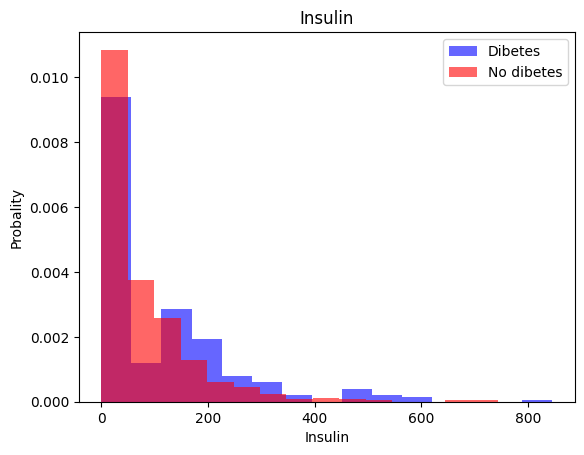

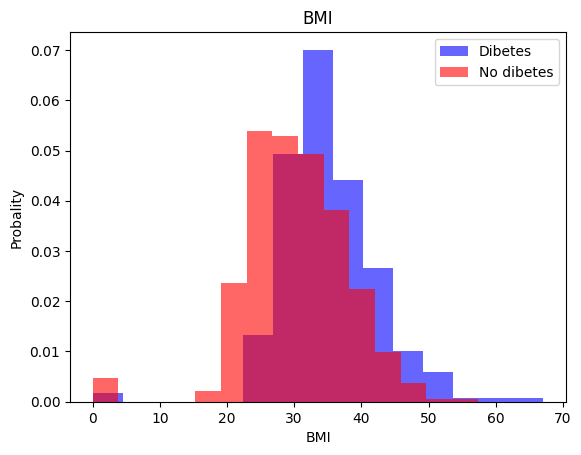

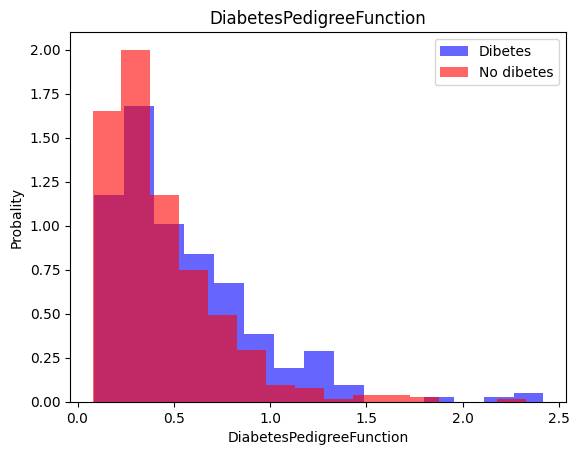

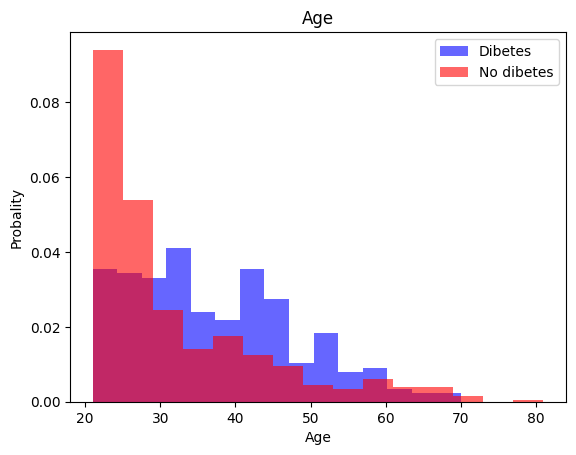

In [8]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome'] == 1][label], color='blue', alpha=0.6, label='Dibetes', density=True, bins=15)
  plt.hist(df[df['Outcome'] == 0][label], color='red', alpha=0.6, label='No dibetes', density=True, bins=15)
  plt.title(label)
  plt.ylabel('Probality')
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [9]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transform_df = pd.DataFrame(data, columns=df.columns)

In [11]:
len(transform_df[transform_df['Outcome'] == 1]), len(transform_df[transform_df['Outcome'] == 0])

(268, 500)

In [12]:
                  #for visulization of transform_df and scaleing of data
# for i in range(len(transform_df.columns[:-1])):
#   label = df.columns[i]
#   plt.hist(transform_df[transform_df['Outcome'] == 1][label], color='blue', alpha=0.6, label='Dibetes', density=True, bins=15)
#   plt.hist(transform_df[transform_df['Outcome'] == 0][label], color='red', alpha=0.6, label='No dibetes', density=True, bins=15)
#   plt.title(label)
#   plt.ylabel('Probality')
#   plt.xlabel(label)
#   plt.legend()
#   plt.show()

In [13]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transform_df = pd.DataFrame(data, columns=df.columns)

In [14]:
len(transform_df[transform_df['Outcome'] == 1]), len(transform_df[transform_df['Outcome'] == 0])

(500, 500)

In [15]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state=0)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [18]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 1s 2ms/step - loss: 0.7029 - accuracy: 0.4983


[0.7028725147247314, 0.4983333349227905]

In [19]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 0.6770 - accuracy: 0.5633 - val_loss: 0.6622 - val_accuracy: 0.5850
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6370 - accuracy: 0.6750 - val_loss: 0.6258 - val_accuracy: 0.6750
Epoch 3/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6062 - accuracy: 0.7183 - val_loss: 0.5952 - val_accuracy: 0.7200
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5794 - accuracy: 0.7317 - val_loss: 0.5644 - val_accuracy: 0.7150
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7350 - val_loss: 0.5383 - val_accuracy: 0.7400
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.5366 - accuracy: 0.7433 - val_loss: 0.5170 - val_accuracy: 0.7450
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5223 - accuracy: 0.7533 - val_loss: 0.5038 - val_accuracy: 0.7450
Epoch 8/20
38/38 [==

In [20]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.5240 - accuracy: 0.7300


[0.524013340473175, 0.7300000190734863]

In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [55]:
test_1 = [[1, 108,	72,	0,	0,	33.6,	0.627,	20]]

In [56]:
pred = model.predict(test_1)
print(pred)

1/1 [==============================] - 0s 99ms/step
[[1.]]
